## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5)

In [2]:
# !pip install opendatasets

## Downloading Hotels Booking Dataset From Kaggle

In [3]:
import opendatasets as od
od.download_kaggle_dataset("https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand", "d:/dataset/")

Skipping, found downloaded files in "d:/dataset/hotel-booking-demand" (use force=True to force download)


## **Data Cleaning and Manipulation**
---

In [4]:
df = pd.read_csv("d:/dataset/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Extracting Categorical Columns

In [10]:
# Looking the categorical columns
df.select_dtypes(include = "object").head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [11]:
# Method 1
categorical_columns = df.select_dtypes(include = "object").columns.tolist()
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [12]:
# Method 2
# [features for features in df.columns if df.dtypes[features] == "object"]

In [13]:
df.rename({"country":"country_code"}, axis = 1, inplace = True)

In [14]:
# look like dataset has country code for each country
df[df["country_code"] == "IND"].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
937,Resort Hotel,0,4,2015,August,32,7,0,2,2,...,No Deposit,240.0,NaN,0,Transient,226.0,0,4,Check-Out,2015-08-09
1791,Resort Hotel,0,11,2015,September,38,14,1,2,2,...,No Deposit,240.0,NaN,0,Transient,160.0,0,0,Check-Out,2015-09-17
2541,Resort Hotel,0,40,2015,October,43,21,0,3,2,...,No Deposit,240.0,NaN,0,Transient,56.0,1,3,Check-Out,2015-10-24
6766,Resort Hotel,1,62,2016,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,220.0,0,0,Canceled,2016-05-01
7071,Resort Hotel,1,17,2016,July,30,19,0,3,2,...,No Deposit,240.0,NaN,0,Transient,191.0,0,0,Canceled,2016-07-02


In [15]:
# !pip install pycountry -q

## Checking and removing the null values

In [16]:
# checking the null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country_code                         488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# checking the null values in percentage
df.isna().sum()/len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country_code                      0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

### There are 1,12,593 null values in the "company" column, which introduces ambiguity into the data. So it would be preferable to remove the "company" column.

In [18]:
# company column has 112593 null values which can produce uncertainty in the data.
# So it's better to drop that particular column
df.drop("company", axis = 1, inplace = True)

In [19]:
# country code column has 488 null values so its better to replace that with mode of country code
# df[df["country_code"].isna() == True].head()

### Column "country_code" has total 488 null values so, I am replacing null values with mode of country_code

In [20]:
df.country_code.mode()

0    PRT
Name: country_code, dtype: object

In [21]:
df["country_code"] = df["country_code"].fillna(df.country_code.mode()[0])

In [22]:
# sns.kdeplot(data = df.agent, fill = True);

### The data of "agent" column is a bit left skewed so its good to impute the nan values with median

In [23]:
df["agent"] = df["agent"].fillna(df.agent.median())

### Replacing missing values of "children" column by median

In [24]:
df["children"] = df["children"].fillna(df.children.median())

In [25]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country_code                      0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## A function that uses Python's pycountry module to retrieve the name of a country from its country code

In [26]:
import pycountry

# function to fetch country name from country code
def get_country_name(country_code):
    try:
        country = pycountry.countries.get(alpha_3 = country_code)
        if country:
            return country.name
        else:
            return "Unknown"
    except LookupError:
        return "Unknown"

In [27]:
# applying the get_country_name function to generate country name 
df['country_name'] = df['country_code'].apply(get_country_name)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom


In [28]:
df.country_name.value_counts()

Portugal                                49078
United Kingdom                          12129
France                                  10415
Spain                                    8568
Germany                                  7287
                                        ...  
Bahamas                                     1
United States Minor Outlying Islands        1
San Marino                                  1
Botswana                                    1
Namibia                                     1
Name: country_name, Length: 176, dtype: int64

# **Exploratory Data Analysis**
---

In [29]:
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [30]:
df.select_dtypes(include = 'object').head()

,hotel,arrival_date_month,meal,country_code,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_name
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Portugal
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Portugal
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,United Kingdom
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,United Kingdom
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,United Kingdom


### Since we already have the country name, my first action will be to remove the country code variable.

In [31]:
df.drop("country_code", axis = 1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,United Kingdom
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,United Kingdom
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,Belgium
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,France
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,Germany
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,United Kingdom


### A function to fetch unique values from all columns

In [32]:
def print_unique_categorical_values(df):
    # Iterate over each column in the dataframe
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of object type (categorical)
            if column in ["country_code", "reservation_status_date", "country_name"]:
                continue
            else:
                unique_values = df[column].unique()  # Get the unique values of the categorical column
                unique_values_str = ', '.join(map(str, unique_values))  # Convert the unique values to a comma-separated string
                print(f"Unique values in '{column}': {unique_values_str}")

print_unique_categorical_values(df)

Unique values in 'hotel': Resort Hotel, City Hotel
Unique values in 'arrival_date_month': July, August, September, October, November, December, January, February, March, April, May, June
Unique values in 'meal': BB, FB, HB, SC, Undefined
Unique values in 'market_segment': Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Undefined, Aviation
Unique values in 'distribution_channel': Direct, Corporate, TA/TO, Undefined, GDS
Unique values in 'reserved_room_type': C, A, D, E, G, F, H, L, P, B
Unique values in 'assigned_room_type': C, A, D, E, G, F, I, B, H, P, L, K
Unique values in 'deposit_type': No Deposit, Refundable, Non Refund
Unique values in 'customer_type': Transient, Contract, Transient-Party, Group
Unique values in 'reservation_status': Check-Out, Canceled, No-Show


## Checking the booking without adults
1. There are 403 bookings without adults.
2. Since I can confirm why the values for adults 0 in these bookings and it's suspicious to have bookings without adults.
3. So I'll be removing all the values for adults are 0.

In [33]:
df[df["adults"] == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06,Portugal
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-10-12,Portugal
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23,Spain
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04,Portugal
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05,Portugal


In [34]:
df.drop(df[df["adults"] == 0].index, inplace = True)

### Creating a new column total guests which includes adults + childrens + babies

In [35]:
df["total guests"] = df.adults + df.children + df.babies
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,total guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom,2.0


In [36]:
# total no of guests in the dataset is 2,34,532
print("The total guests in the dataset is:", df["total guests"].sum())

The total guests in the dataset is: 234532.0


### Comparison between City Hotel and Resort Hotel
1. Based on my comparison of a city hotel and a resort hotel, I may conclude that a city hotel receives more reservations than a resort hotel.
2. The city hotel hosts the most visitors.

In [37]:
df.groupby("hotel").sum(numeric_only = True)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total guests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,32995,8670932,159156780,2145319,1246089,62646,172065,146838,6795.0,389,1976,6317,10475,14486,2109348.0,255814,8333848.56,1925,43071,154022.0
Resort Hotel,11120,3712109,80739617,1086861,633521,47649,125289,74798,5155.0,557,1778,4075,5867,11516,7043855.0,20898,3803786.36,5530,24828,80510.0


In [38]:
# creating weekday column from arrival date
df["reservation_status_date"] = pd.to_datetime(df.reservation_status_date)
df["weekday"] = df.reservation_status_date.dt.day_name()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,total guests,weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2.0,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2.0,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,1.0,Thursday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,1.0,Thursday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom,2.0,Friday


### These are the most busiest weekdays

In [39]:
df_weekday = df.groupby("weekday").size().reset_index().rename(columns = {0:"total bookings"}).sort_values("total bookings", ascending = False)
df_weekday

,weekday,total bookings
1,Monday,18625
0,Friday,18408
4,Thursday,18084
6,Wednesday,17875
5,Tuesday,16677
3,Sunday,16451
2,Saturday,12867


### These are the most busiest months

In [40]:
df_month = df.groupby("arrival_date_month").size().reset_index().rename(columns = {0:"total bookings"}).sort_values("total bookings", ascending = False)
df_month

,arrival_date_month,total bookings
1,August,13829
5,July,12611
8,May,11764
10,October,11131
0,April,11057
6,June,10917
11,September,10489
7,March,9751
3,February,8034
9,November,6765


### Total Bookings over the years

In [41]:
df_year = df.groupby("arrival_date_year").size().reset_index().rename(columns = {0:"total bookings"}).sort_values("total bookings", ascending= False)
df_year

,arrival_date_year,total bookings
1,2016,56478
2,2017,40557
0,2015,21952


### Total Cancellations and Average Lead Time per Hotel

In [42]:
df_cancel = df.groupby("hotel").aggregate({"is_canceled":"sum", "lead_time":"mean"}).rename(columns = {"is_canceled":"total_cancellations","lead_time":"average_lead_time"})
df_cancel

,total_cancellations,average_lead_time
hotel,,
City Hotel,32995,109.842057
Resort Hotel,11120,92.693810


### Total Bookings by Market Segment

In [43]:
df_market = df.groupby("hotel")["market_segment"].size().reset_index().rename(columns = {"market_segment":"market segment booking"})
df_market

,hotel,market segment booking
0,City Hotel,78940
1,Resort Hotel,40047


### Total Bookings by Market Segment & Deposit Type

In [44]:
df_deposit = df.groupby(["market_segment", "deposit_type"]).size().reset_index().rename(columns = {0:"total bookings"}).sort_values("total bookings", ascending = False)
df_deposit

,market_segment,deposit_type,total bookings
14,Online TA,No Deposit,56147
11,Offline TA/TO,No Deposit,19169
5,Direct,No Deposit,12528
8,Groups,No Deposit,10489
9,Groups,Non Refund,9172
12,Offline TA/TO,Non Refund,5006
2,Corporate,No Deposit,4944
1,Complementary,No Deposit,724
3,Corporate,Non Refund,334
0,Aviation,No Deposit,235


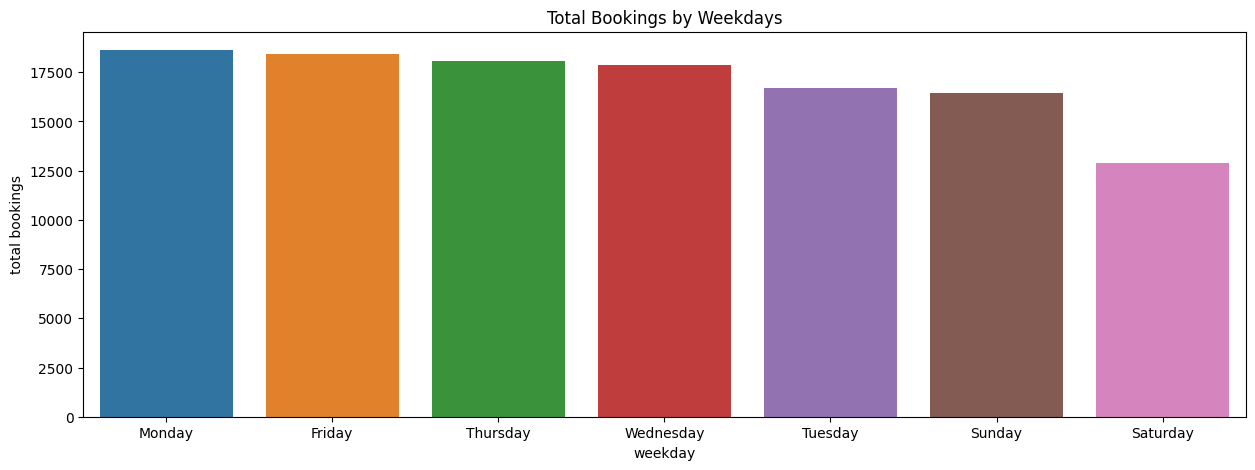

In [45]:
plt.figure(figsize = (15,5))
plt.title("Total Bookings by Weekdays")
sns.barplot(data = df_weekday, x = "weekday", y = "total bookings");

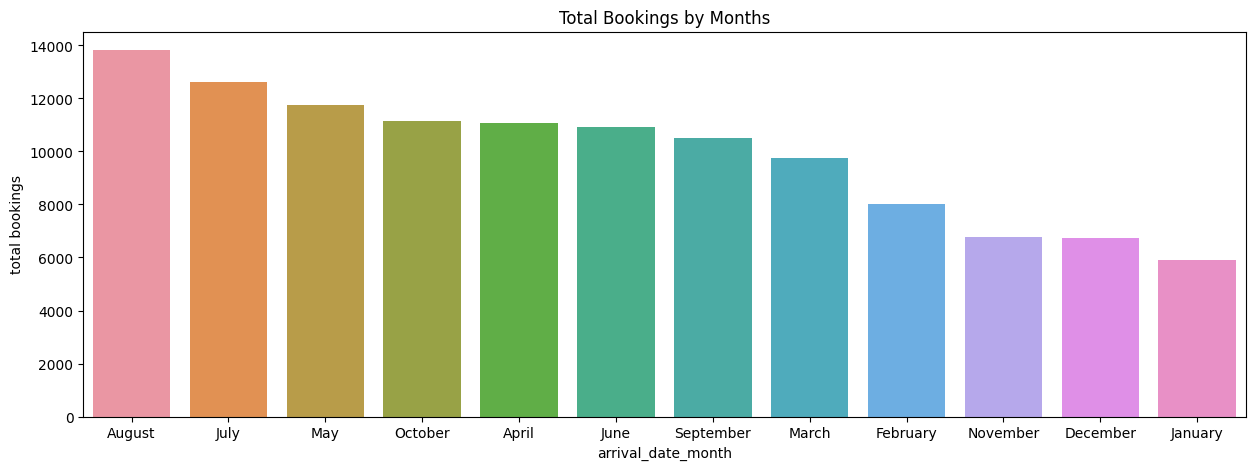

In [46]:
plt.figure(figsize = (15,5))
plt.title("Total Bookings by Months")
sns.barplot(data = df_month, x = "arrival_date_month", y = "total bookings");

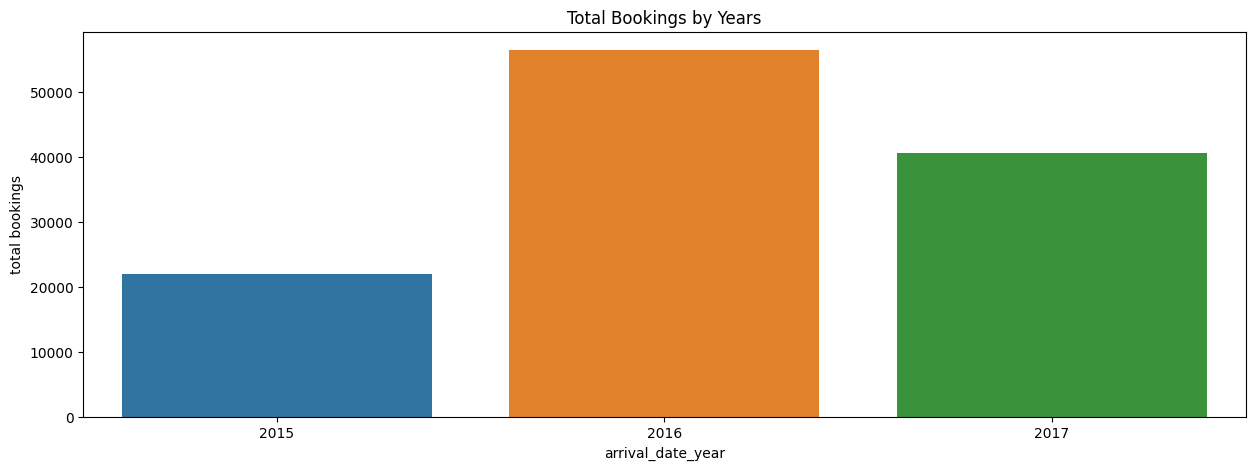

In [47]:
plt.figure(figsize = (15,5))
plt.title("Total Bookings by Years")
sns.barplot(data = df_year, x = "arrival_date_year", y = "total bookings");

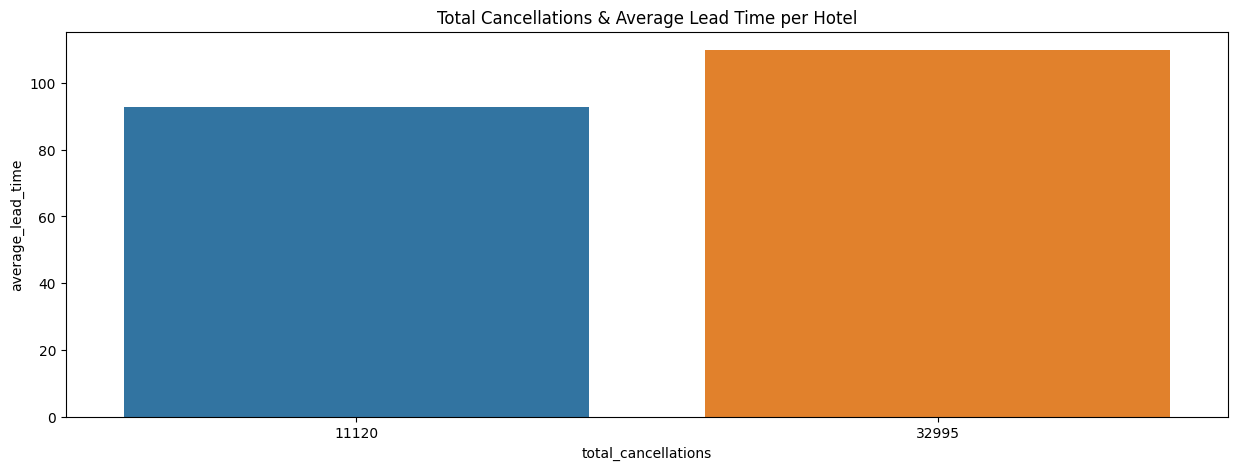

In [48]:
plt.figure(figsize = (15,5))
plt.title("Total Cancellations & Average Lead Time per Hotel")
sns.barplot(data = df_cancel, x = "total_cancellations", y = "average_lead_time");

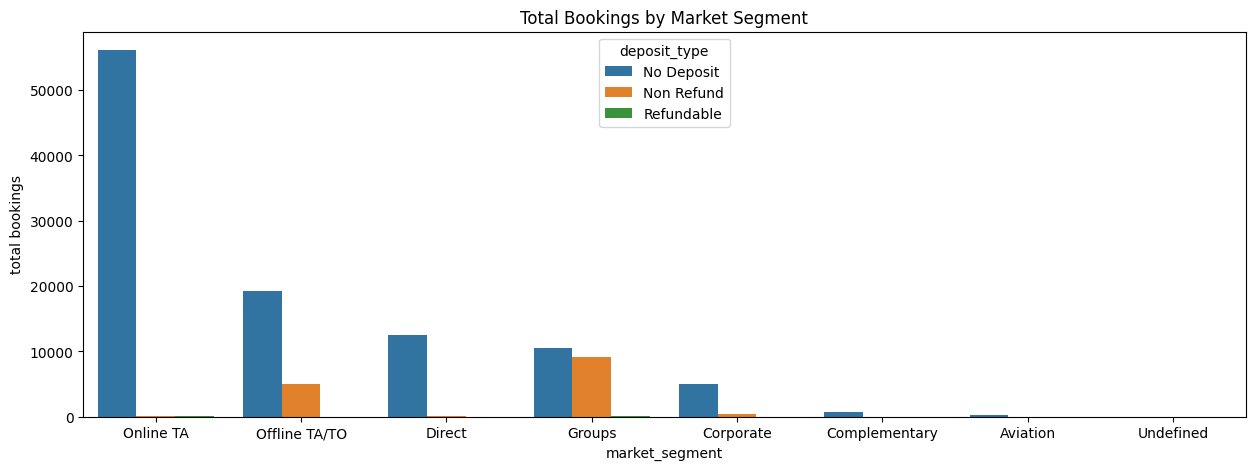

In [49]:
plt.figure(figsize = (15,5))
plt.title("Total Bookings by Market Segment")
sns.barplot(data = df_deposit, x = "market_segment", y = "total bookings", hue = "deposit_type");

## A function to plot bar chart for all the categorical columns

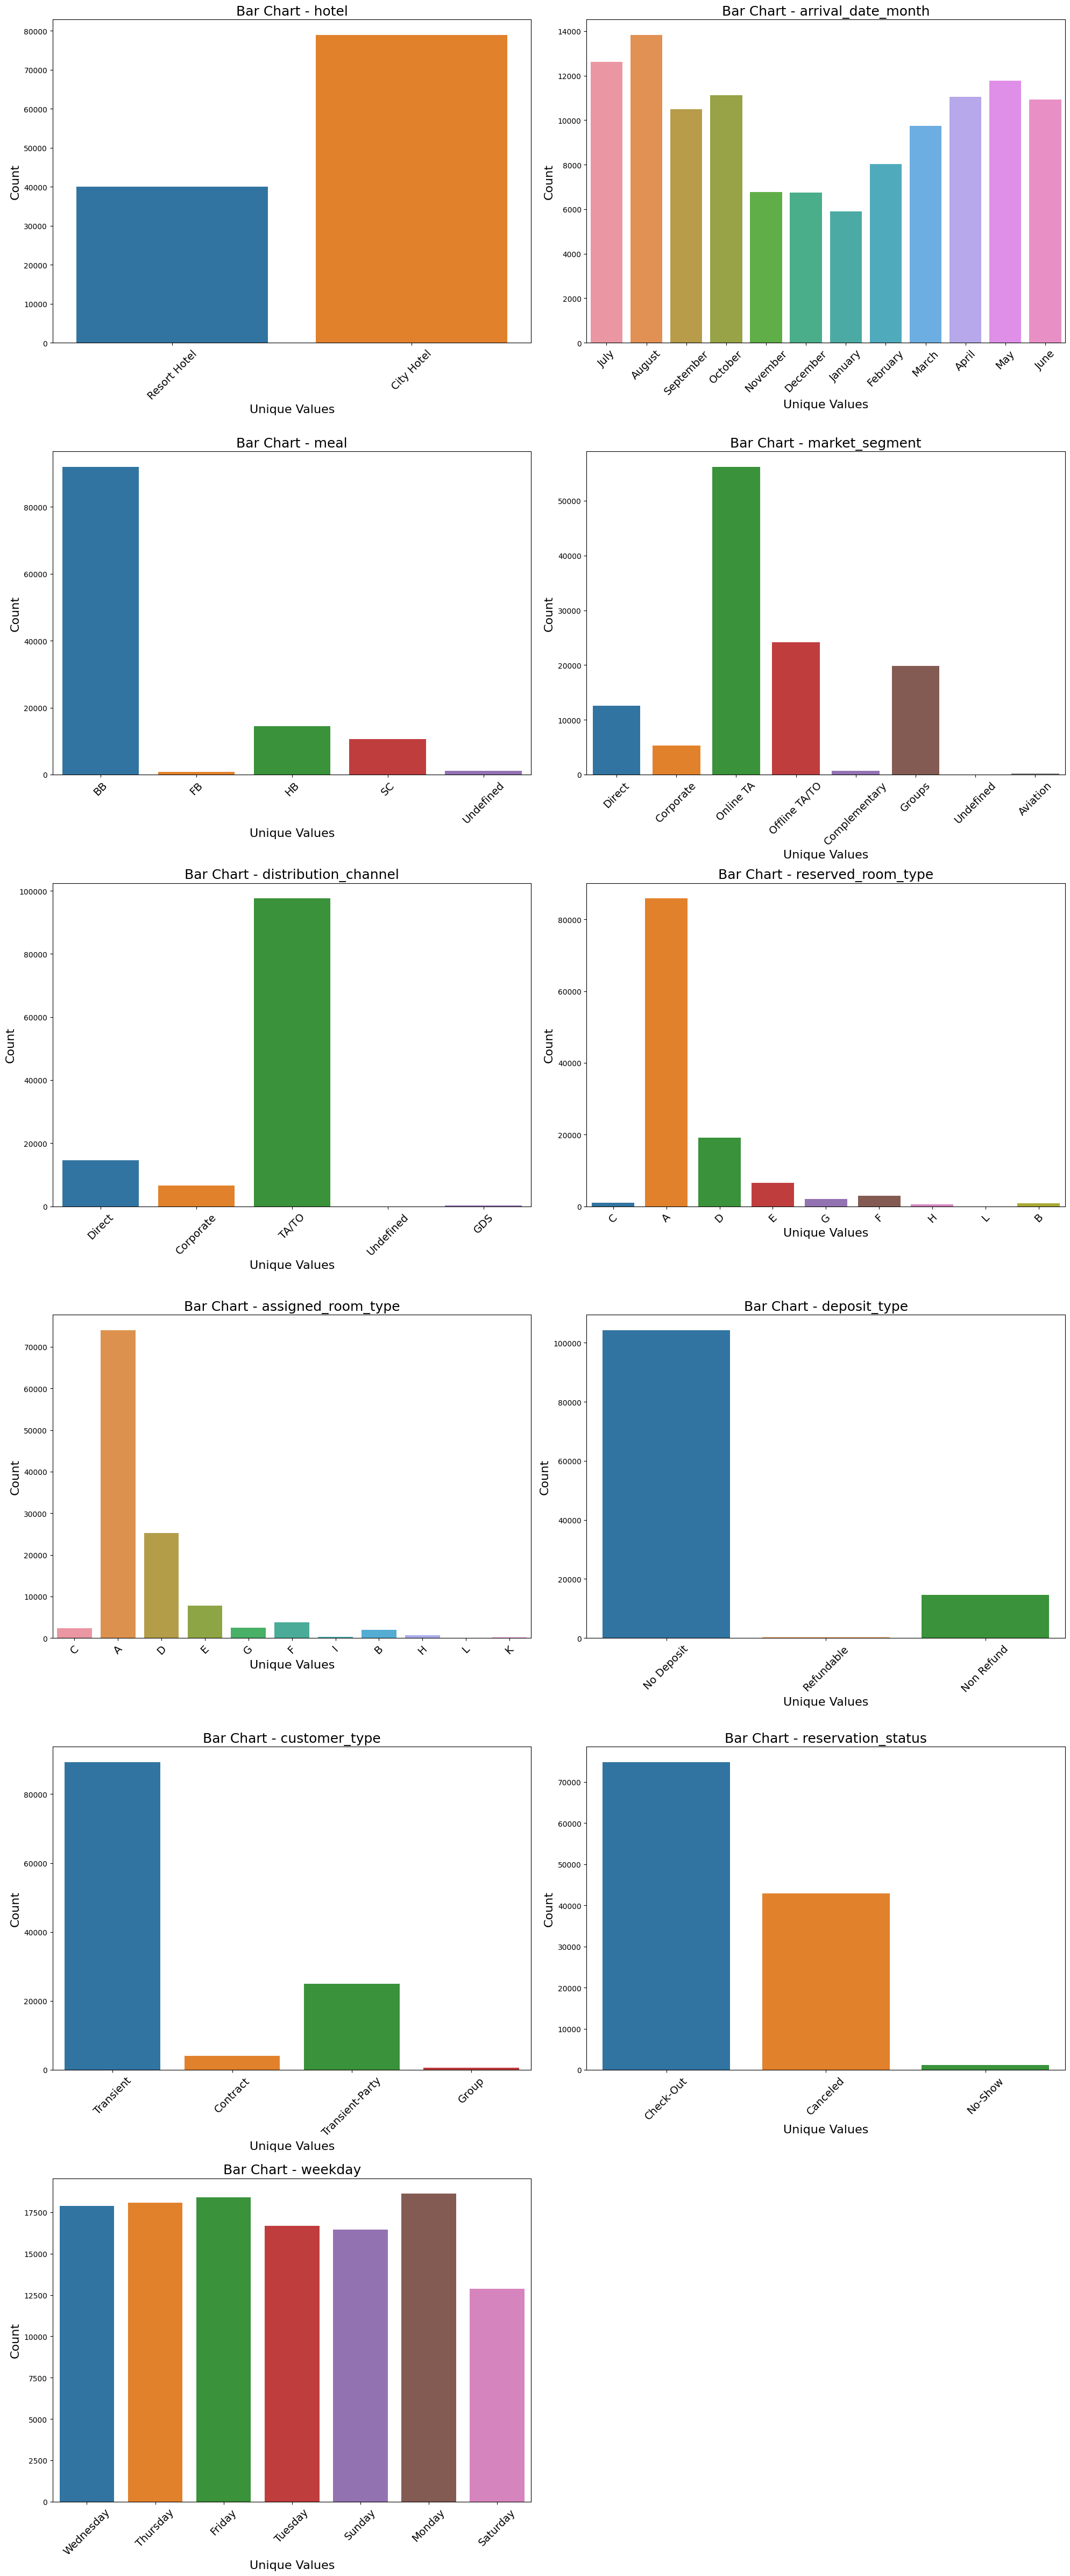

In [50]:
def create_bar_chart_matrix(df):
    categorical_columns = df.select_dtypes(include='object').columns # Get the categorical columns
    num_columns = len(categorical_columns)
    num_rows = (num_columns + 1) // 2  # Determine the number of rows for subplots
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 8))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, column in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(data=df, x=column, ax=ax)
        ax.set_title(f'Bar Chart - {column}', fontsize=18)  # Increase title font size
        ax.set_xlabel('Unique Values', fontsize=16)  # Increase x-label font size
        ax.set_ylabel('Count', fontsize=16)  # Increase y-label font size
        ax.tick_params(axis='x', rotation=45, labelsize=14)  # Increase x-axis label font size and rotation
    
    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

create_bar_chart_matrix(df.drop(["country_code", "country_name"], axis = 1))

In [51]:
df_country = df.groupby("country_name").size().reset_index().rename(columns = {0:"total bookings"}).sort_values(by = "total bookings", ascending = False)
df_country

,country_name,total bookings
129,Portugal,48918
165,United Kingdom,12105
54,France,10376
148,Spain,8546
59,Germany,7271
...,...,...
111,Myanmar,1
26,Burundi,1
55,French Polynesia,1
150,Sudan,1


### Top 10 Countries by Hotel Bookings

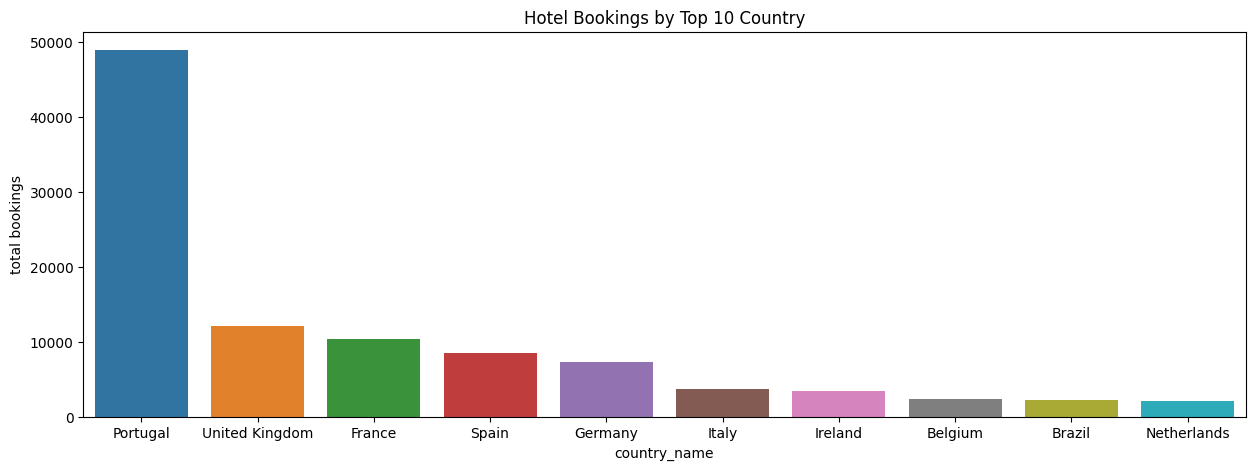

In [52]:
plt.figure(figsize = (15,5))
plt.title("Hotel Bookings by Top 10 Country")
sns.barplot(data = df_country.head(10), x = "country_name", y = "total bookings");

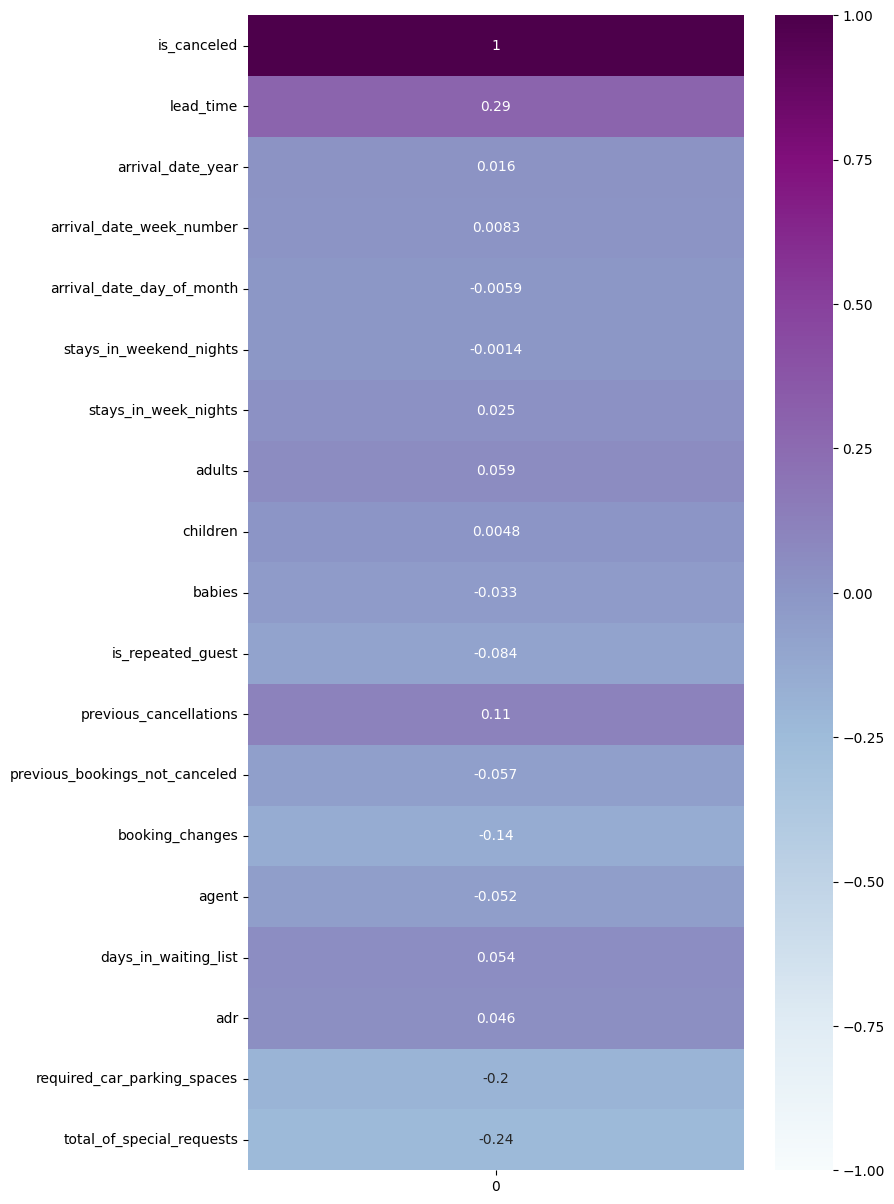

In [53]:
corr = df.corrwith(df["is_canceled"], numeric_only = True).iloc[:-1].to_frame()
fig, ax = plt.subplots(figsize = (8,15))
sns.heatmap(corr, cmap = "BuPu", annot = True, vmin = -1, vmax = 1, ax = ax);

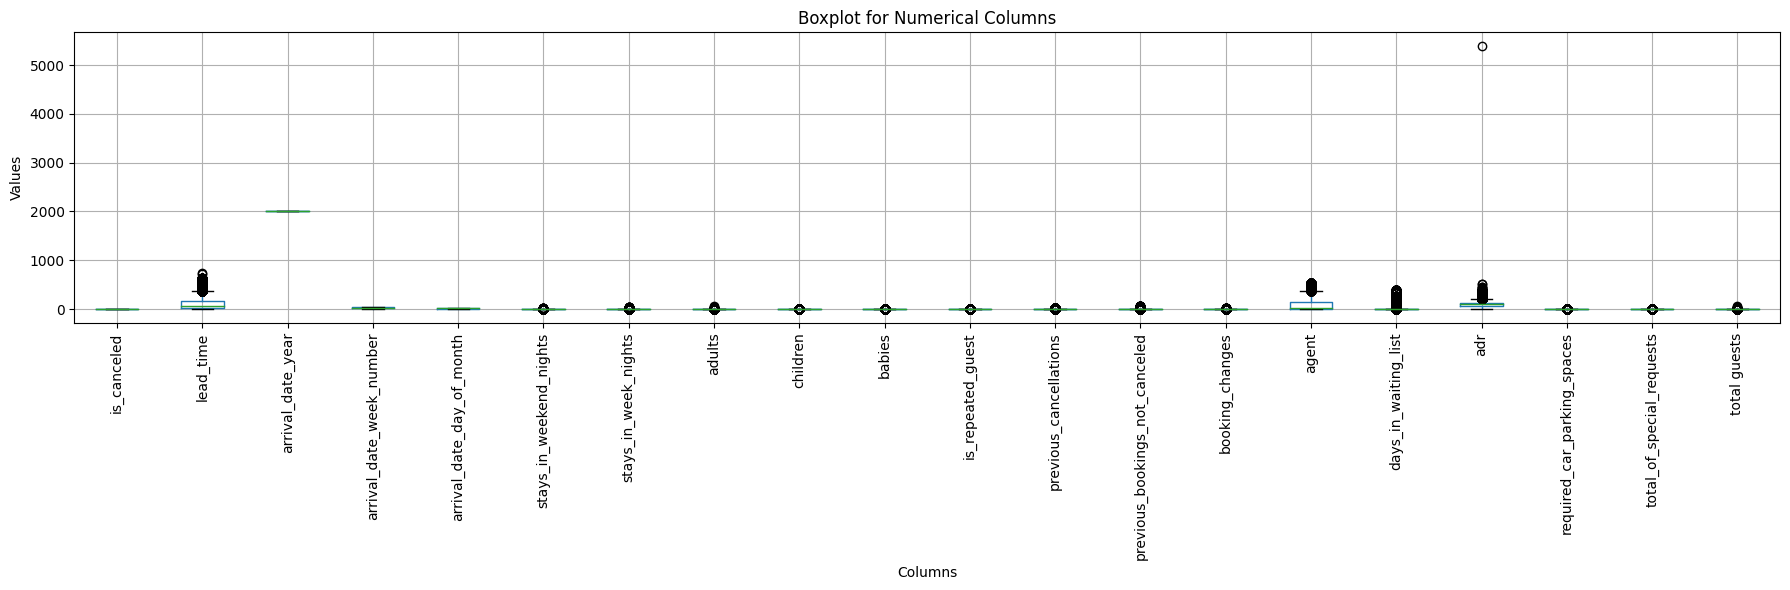

In [54]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a boxplot for each numerical column
plt.figure(figsize=(18, 6))  # Adjust the figsize as per your preference
df[numerical_columns].boxplot()
plt.title('Boxplot for Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.tight_layout()  # Add this line to adjust spacing between subplots
plt.show()

In [55]:
# def plot_numerical_relationships(df):
#     numerical_columns = df.select_dtypes(include='number').columns  # Get the numerical columns
    
#     sns.pairplot(data=df[numerical_columns])
#     plt.show()

# plot_numerical_relationships(df)

In [56]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country_code', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'country_name',
       'total guests', 'weekday'],
      dtype='object')

In [57]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country_code                      0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [58]:
df.select_dtypes(include = "object").columns

Index(['hotel', 'arrival_date_month', 'meal', 'country_code', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'country_name',
       'weekday'],
      dtype='object')

### Removing all the irrelavant features

In [59]:
df.drop(['hotel', 'country_code', 'assigned_room_type', 'reservation_status_date', 'country_name', 'days_in_waiting_list', 'booking_changes', 
           'weekday', 'reservation_status'], axis = 1, inplace = True)

In [60]:
df.select_dtypes(include = "object").columns

Index(['arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Select categorical columns for one-hot encoding
categorical_columns = ['arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type']

# Create a copy of the DataFrame with only the categorical columns
df_categorical = df[categorical_columns].copy()

# Handle missing values in the categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df_categorical_imputed = pd.DataFrame(imputer.fit_transform(df_categorical), columns=df_categorical.columns)

# Perform one-hot encoding on the imputed categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_categorical_imputed)

# Get the feature names for the encoded features
feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded features and column names
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Print the encoded DataFrame
df_encoded.head()

D:\Program File\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,342.0,2015.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,737.0,2015.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,7.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,13.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,14.0,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
df_encoded.isna().sum()

is_canceled                      403
lead_time                        403
arrival_date_year                403
arrival_date_week_number         403
arrival_date_day_of_month        403
                                ... 
deposit_type_Refundable          403
customer_type_Contract           403
customer_type_Group              403
customer_type_Transient          403
customer_type_Transient-Party    403
Length: 64, dtype: int64

In [65]:
df_encoded.shape

(119390, 64)

In [66]:
df_encoded.dropna(inplace = True)

In [67]:
df_encoded.shape

(118584, 64)

In [68]:
df_encoded.isna().sum()

is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_week_number         0
arrival_date_day_of_month        0
                                ..
deposit_type_Refundable          0
customer_type_Contract           0
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
Length: 64, dtype: int64

In [ ]:
# df_encoded.is_canceled.value_counts()

In [74]:
X = df_encoded.drop("is_canceled", axis = 1)
y = df_encoded.is_canceled

In [75]:
X

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342.0,2015.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,737.0,2015.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14.0,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118982,198.0,2017.0,34.0,24.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
118983,101.0,2017.0,35.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
118984,0.0,2017.0,35.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
118985,98.0,2017.0,35.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
118982    0.0
118983    0.0
118984    0.0
118985    0.0
118986    0.0
Name: is_canceled, Length: 118584, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18)

In [78]:
X_train

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
90799,107.0,2016.0,24.0,10.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
90132,14.0,2016.0,23.0,30.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15825,210.0,2015.0,31.0,31.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31916,0.0,2017.0,2.0,11.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
55679,291.0,2016.0,34.0,19.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,63.0,2015.0,37.0,11.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
35665,239.0,2017.0,16.0,22.0,2.0,5.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91476,93.0,2016.0,26.0,20.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
94720,3.0,2016.0,32.0,5.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
y_train

90799    0.0
90132    0.0
15825    0.0
31916    0.0
55679    1.0
        ... 
1726     0.0
35665    0.0
91476    0.0
94720    0.0
60823    1.0
Name: is_canceled, Length: 83008, dtype: float64

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with feature scaling and logistic regression
model1 = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the pipeline to the data
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [94]:
model1.predict(X_test)

array([0., 1., 0., ..., 1., 1., 0.])

In [95]:
model1.score(X_test, y_test)

0.7770969192714189

In [149]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [150]:
model2.predict(X_test)

array([1., 0., 0., ..., 1., 0., 1.])

In [151]:
model2.score(X_test, y_test)

0.835265843066155

In [99]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB()

In [100]:
model3.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [102]:
model3.score(X_test, y_test)

0.5590847762536542

In [155]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier()
model4.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
model4.predict(X_test)

array([1., 0., 0., ..., 1., 0., 0.])

In [157]:
model4.score(X_test, y_test)

0.8773032002361175

In [131]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)

AdaBoostClassifier()

In [132]:
model5.predict(X_test)

array([1., 0., 1., ..., 1., 1., 0.])

In [133]:
model5.score(X_test, y_test)

0.803642956529072

In [112]:
from sklearn.neighbors import KNeighborsClassifier

model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)

KNeighborsClassifier()

In [113]:
model6.predict(X_test)

array([1., 1., 1., ..., 0., 0., 0.])

In [114]:
model6.score(X_test, y_test)

0.7705194513154936

In [115]:
!pip install xgboost -q

In [117]:
from xgboost import XGBClassifier

model7 = XGBClassifier()
model7.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [118]:
model7.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [120]:
model7.score(X_test, y_test)

0.8604396222172251

In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from joblib import parallel_backend

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grid_lr = {'C': [0.1, 1.0, 10.0]}
param_grid_nb = {}  # No hyperparameters for Gaussian Naive Bayes
param_grid_dt = {'max_depth': [None, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300]}
param_grid_ab = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

# Models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    XGBClassifier()
]

# Perform cross-validation and grid search for each model in parallel
with parallel_backend('multiprocessing'):  # Set the backend for parallel processing
    results = []
    for model, param_grid in zip(models, [param_grid_lr, param_grid_nb, param_grid_dt, param_grid_rf, param_grid_ab, param_grid_knn, param_grid_xgb]):
        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)  # Use n_jobs=-1 to utilize all available cores
        grid_search.fit(X_train, y_train)
        
        # Get the best model with tuned hyperparameters
        best_model = grid_search.best_estimator_
        
        # Make predictions on the testing set
        y_pred = best_model.predict(X_test)
        
        # Evaluate the model's accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the model's accuracy and best hyperparameters
        results.append((type(model).__name__, accuracy, grid_search.best_params_))

# Print the results
for model_name, accuracy, best_params in results:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Best Hyperparameters: {best_params}")
    print()

Model: LogisticRegression
Accuracy: 0.7508538179365012
Best Hyperparameters: {'C': 10.0}

Model: GaussianNB
Accuracy: 0.560905679470422
Best Hyperparameters: {}

Model: DecisionTreeClassifier
Accuracy: 0.8347177130328456
Best Hyperparameters: {'max_depth': None}

Model: RandomForestClassifier
Accuracy: 0.8780199856642914
Best Hyperparameters: {'n_estimators': 200}

Model: AdaBoostClassifier
Accuracy: 0.8098410422903403
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 150}

Model: KNeighborsClassifier
Accuracy: 0.7802420204916305
Best Hyperparameters: {'n_neighbors': 3}

Model: XGBClassifier
Accuracy: 0.8473247037989627
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7}



In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from joblib import parallel_backend
import time

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grids for each algorithm
param_grid_dt = {'max_depth': [None, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300, 400]}
param_grid_ab = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 0.3, 0.5, 1.0]}
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001, 0.0001]}

# Perform grid search and select the best model for each algorithm
best_models = {}
execution_times = {}

# Decision Tree
dt = DecisionTreeClassifier()
start_time = time.time()
with parallel_backend('multiprocessing'):  # Utilize all available cores
    grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
    grid_search_dt.fit(X_train, y_train)
execution_times['Decision Tree'] = time.time() - start_time
best_model_dt = grid_search_dt.best_estimator_
best_models['Decision Tree'] = best_model_dt

# Random Forest
rf = RandomForestClassifier()
start_time = time.time()
with parallel_backend('multiprocessing'):  # Utilize all available cores
    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
    grid_search_rf.fit(X_train, y_train)
execution_times['Random Forest'] = time.time() - start_time
best_model_rf = grid_search_rf.best_estimator_
best_models['Random Forest'] = best_model_rf

# AdaBoost
ab = AdaBoostClassifier()
start_time = time.time()
with parallel_backend('multiprocessing'):  # Utilize all available cores
    grid_search_ab = GridSearchCV(ab, param_grid_ab, cv=5)
    grid_search_ab.fit(X_train, y_train)
execution_times['AdaBoost'] = time.time() - start_time
best_model_ab = grid_search_ab.best_estimator_
best_models['AdaBoost'] = best_model_ab

# XGBoost
xgb = XGBClassifier()
start_time = time.time()
with parallel_backend('multiprocessing'):  # Utilize all available cores
    grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
    grid_search_xgb.fit(X_train, y_train)
execution_times['XGBoost'] = time.time() - start_time
best_model_xgb = grid_search_xgb.best_estimator_
best_models['XGBoost'] = best_model_xgb

# Evaluate the best models on the testing set
accuracies = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Select the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model = best_models[best_model_name]

# Print the accuracies, execution times, and the best model
for model_name, accuracy in accuracies.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Execution Time: {execution_times[model_name]:.2f} seconds")
    print()

print(f"Best Model: {best_model_name}")
print(f"Best Model Accuracy: {accuracies[best_model_name]}")
print(f"Best Model Execution Time: {execution_times[best_model_name]:.2f} seconds")
print(f"Best Model Hyperparameters: {best_model.get_params()}")


Model: Decision Tree
Accuracy: 0.8355188261584517
Execution Time: 12.36 seconds

Model: Random Forest
Accuracy: 0.8788632626386137
Execution Time: 150.43 seconds

Model: AdaBoost
Accuracy: 0.8086604545262892
Execution Time: 214.32 seconds

Model: XGBoost
Accuracy: 0.8473247037989627
Execution Time: 124.42 seconds

Best Model: Random Forest
Best Model Accuracy: 0.8788632626386137
Best Model Execution Time: 150.43 seconds
Best Model Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))